# Beispiel: Flachheitsbasierte Folgeregelung einer elektromagnetisch gelagerten Spindel

Getestet unter Python 3.8, SymPy 1.7.1, Matplotlib 3.4.3, NumPy 1.21.2, ipywidgets 7.6.5, IPython 7.28.0

**Achtung:** Die Rechnungen in diesem Notebook können etwas Zeit in Anspruch nehmen!

In [1]:
import numpy as np
import sympy as sp
import ipywidgets as widgets
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import matplotlib.animation as mpla
from sympy import init_printing
from IPython.display import HTML
init_printing(use_latex=True)

## Aufgabenstellung:
Als Alternative zu mechanischen Lagern können elektromagnetische Lager eingesetzt werden. Im Folgenden soll die Bewegungsplanung und stabilisierende Folgeregelung für eine elektromagnetisch gelagerte Spindel vorgestellt werden. Die Spindel wird als ein starrer Körper betrachtet, der sich - in einem geringen Bereich - frei bewegen kann. Für fünf der sechs mechanischen Freiheitsgrade werden aktive elektromagnetische Lager eingesetzt, der sechste Freiheitsgrad entspricht der Drehung der Spindel um ihre Längsachse. Dafür wird ein Asynchronmotor verwendet. Die Magnetlager zur radialen Positionierung sind beim hier untersuchten Aufbau in der klassischen Weise in zwei zur Längsachse orthogonalen Lagerebenen installiert, jeweils paarweise einander gegenüberstehend in zwei zueinander orthogonalen Richtungen. Anwendungsgebiete dieser Betriebsweise liegen insbesondere im Bereich der Unrundbearbeitung.

## Flachheitsnachweis

Für die $s = 24$ Systemgrößen: 
\begin{align*}
X, Y, Z, \psi, \theta, \phi,\\ 
v_X, v_Y, v_Z, \omega_{\psi}, \omega_{\theta}, \omega_{\phi},\\
a_X, a_Y, a_Z, \alpha_{\psi}, \alpha_{\theta}, \alpha_{\phi},\\
F_{x}, F_{v,y}, F_{v,z}, F_{h,y}, F_{h,z}, D_{\phi}
\end{align*}

folgen aus einer Modellbildung $q = 18$ Systemgleichungen:
\begin{align}
    \dot{X} &= v_X \tag{1}\label{eq:1}\\
    \dot{v}_X &= a_X \tag{2}\label{eq:2}\\
    m a_X &= F_x + m g_x \tag{3}\label{eq:3}\\
    \dot{Y} &= v_Y \tag{4}\label{eq:4}\\
    \dot{v}_Y &= a_Y \tag{5}\label{eq:5}\\
    m a_Y &= F_{v,y} + F_{h,y} + m g_y \tag{6}\label{eq:6}\\
    \dot{Z} &= v_Z \tag{7}\label{eq:7}\\
    \dot{v}_Z &= a_Z \tag{8}\label{eq:8}\\
    m a_Z &= F_{v,z} + F_{h,z} + m g_z \tag{9}\label{eq:9}\\
    \dot{\psi} &= \omega_{\psi} \tag{10}\label{eq:10}\\
    \dot{\omega}_{\psi} &= \alpha_{\psi} \tag{11}\label{eq:11}\\
    J_2 \alpha_{\psi} &= -(l_{f,v}-X) F_{v,z} + (l_{f,h}+X) F_{h,z} - J_1 \dot{\phi} \dot{\theta} \tag{12}\label{eq:12}\\
    \dot{\theta} &= \omega_{\theta} \tag{13}\label{eq:13}\\
    \dot{\omega}_{\theta} &= \alpha_{\theta} \tag{14}\label{eq:14}\\
    J_2 \alpha_{\theta} &= (l_{f,v}-X) F_{v,y} - (l_{f,h}+X) F_{h,y} + J_1 \dot{\phi} \dot{\psi} \tag{15}\label{eq:15}\\
    \dot{\phi} &= \omega_{\phi} \tag{16}\label{eq:16}\\
    \dot{\omega}_{\phi} &= \alpha_{\phi} \tag{17}\label{eq:17}\\
    J_1 \alpha_{\phi} &= D_{\phi} \tag{18}\label{eq:18}
\end{align}

Falls ein flacher Ausgang zu diesem System existiert, hat dieser also $m = s - q = 6$ Komponenten.

Es sei angenommen, dieser flache Ausgang würde sich aus $z = (X, Y, Z, \psi, \theta, \phi)$ zusammensetzen. Dann wäre erfahrungsgemäß nur noch zu prüfen, ob alle Systemgrößen sich aus $z$ und Ableitungen dessen Komponenten darstellen lassen.

Für die Komponenten von $z$ sowie dessen Ableitungen ist dieser Nachweis trivial. Übrig bleiben also nur die zu stellenden Kräfte und das aufgebrachte Drehmoment:
\begin{align}
    \text{aus } \eqref{eq:1}, \eqref{eq:2}, \eqref{eq:3}: F_x &= m \ddot{X} - m g_x \\
    \text{aus } \eqref{eq:16}, \eqref{eq:17}, \eqref{eq:18}: D_{\phi} &= J_1 \ddot{\phi} \\
    \text{aus }  (l_{f,v} - X) \cdot \eqref{eq:6} - \eqref{eq:15}: F_{h,y} &= \frac{J_1 \dot{\phi}\dot{\psi} - J_2 \ddot{\theta} + (l_{f,v} - X)(m \ddot{Y} - m g_y)}{l_{f,h} + l_{f,v}} \\
    \text{aus }  (l_{f,h} + X) \cdot \eqref{eq:6} + \eqref{eq:15}: F_{v,y} &= \frac{J_2 \ddot{\theta} - J_1 \dot{\phi}\dot{\psi} + (l_{f,h} + X)(m \ddot{Y} - m g_y)}{l_{f,h} + l_{f,v}} \\
    \text{aus }  (l_{f,v} - X) \cdot \eqref{eq:9} + \eqref{eq:12}: F_{h,z} &= \frac{J_1 \dot{\phi}\dot{\theta} + J_2 \ddot{\psi} + (l_{f,v} - X)(m \ddot{Z} - m g_z)}{l_{f,h} + l_{f,v}} \\
    \text{aus }  (l_{f,h} + X) \cdot \eqref{eq:9} - \eqref{eq:12}: F_{v,z} &= \frac{-J_1 \dot{\phi}\dot{\theta} - J_2 \ddot{\psi} + (l_{f,h} + X)(m\ddot{Z} - m g_z)}{l_{f,h} + l_{f,v}} \\
\end{align}

Damit ist gezeigt, dass es sich bei $z = (X, Y, Z, \psi, \theta, \phi)$ um einen flachen Ausgang des Systems handelt.

## Reglerentwurf

Alle Positionen, Winkel und die zugehörigen Geschwindigkeiten werden in diesem Abschnitt als gemessen angenommen. Die Kräfte und das Moment werden zunächst als Stellgrößen aufgefasst.

### Linearisierung der Folgefehlerdynamik mittels statischer Zustandsrückführung

Eine kompaktere Darstellung der Systemgleichungen führt zu:
\begin{align}
     m \ddot{X} &= F_x + m g_x \\
     m \ddot{Y} &= F_{v,y} + F_{h,y} + m g_y \\
     m \ddot{Z} &= F_{v,z} + F_{h,z} + m g_z \\
     J_2 \ddot{\psi} &= -(l_{f,v}-X) F_{v,z} + (l_{f,h}+X) F_{h,z} - J_1 \dot{\phi} \dot{\theta} \\
     J_2 \ddot{\theta} &= (l_{f,v}-X) F_{v,y} - (l_{f,h}+X) F_{h,y} + J_1 \dot{\phi} \dot{\theta} \\
     J_1 \ddot{\phi} &= D_{\phi}
\end{align}

Durch die bereits nachgewiesene Flachheit kann für jedes dieser Teilsysteme ein stabilisierender Regler entworfen werden, exemplarisch für $X$ und dessen Fehler $e := X - X_{soll}$:
\begin{align}
    \ddot{X} = \ddot{X}_{soll} - c_1 \dot{e} - c_0 e
\end{align}

Hierbei ist $X_{soll}$ eine zu entwerfende zweimal differenzierbare Solltrajektorie von $X$. Durch die Konstanten $c_1$ und $c_0$ können die Eigenwerte $\lambda_1, \lambda_2$ der Fehlerdynamik zweiter Ordnung platziert werden:
\begin{align}
    \ddot{e} + c_1 \dot{e} + c_0 e &= 0 \\
    \iff \ddot{e} - (\lambda_1 + \lambda_2) \dot{e} + \lambda_1 \lambda_2 e &= 0
\end{align}

Durch Auflösen solcher Fehlerdifferenzialgleichungen nach den Beschleunigungen sowie durch Messungen der Positionen, Winkel und Geschwindigkeiten können daraufhin die im Flachheitsnachweis hergeleiteten Kräfte und das Drehmoment bestimmt werden.

## Trajektorienplanung

Eine elliptische Bewegung des Massenschwerpunkts in der $Y-Z$-Ebene ist gefordert:
\begin{align}
    Y_{soll}(t) &= r_y(t) \cos(\Omega t) \\
    Z_{soll}(t) &= r_z(t) \sin(\Omega t) \\
    \phi_{soll}(t) &= \omega_0 t + \phi_0, \omega_0 = \text{const.} \\
    X_{soll}(t) &= \psi_{soll}(t) = \theta_{soll}(t) = 0
\end{align}

Aus den Differenzierbarkeitsanforderungen an $Y_{soll}(t), Z_{soll}(t)$ ist ersichtlich, dass auch $r_y(t), r_z(t)$ zwei mal differenzierbar sein müssen:
\begin{align}
    \ddot{Y}_{soll}(t) &= (\ddot{r_y} - r_y \Omega^2) \cos(\Omega t) - 2 \Omega \dot{r_y} \sin(\Omega t)\\
    \ddot{Z}_{soll}(t) &= (\ddot{r_z} - r_z \Omega^2) \sin(\Omega t) + 2 \Omega \dot{r_z} \cos(\Omega t) \\
    \ddot{\phi}_{soll}(t) &= 0 \\
\end{align}

Die Trajektorien starten alle gleichzeitig zum Zeitpunkt $t = 0$ und enden bei $t = t^*$. Dabei gelten die folgenden Bedingungen an Anfangs- und Endwerte:
\begin{align}
    r_y(0) &= \dot{r}_y(0) = \ddot{r}_y(0) = 0 \\
    r_z(0) &= \dot{r}_z(0) = \ddot{r}_z(0) = 0 \\
    r_y(t^*) &= r_y^*, \dot{r}_y(t^*) = \ddot{r}_y(t^*) = 0 \\
    r_z(t^*) &= r_z^*, \dot{r}_z(t^*) = \ddot{r}_z(t^*) = 0
\end{align}

Aus also jeweils 6 Bedingungen an die Sollverläufe von $Y$ und $Z$ folgt der Ansatz eines Polynoms fünfter Ordnung mit Hilfe der Prototypenfunktion:
\begin{align}
    p(t) = 10 \left(\frac{t}{t^*}\right)^3 - 15 \left(\frac{t}{t^*}\right)^4 + 6 \left(\frac{t}{t^*}\right)^5
\end{align}

und damit:
\begin{align}
    r_y(t) = r_y^* p(t) \\
    r_z(t) = r_z^* p(t)
\end{align}

## Simulation

### Definition der Symbole

In [2]:
t = sp.Symbol('t')
tstar = sp.Symbol('t^*')
p = sp.Symbol('p')

m = sp.Symbol('m')
J1 = sp.Symbol('J_1')
J2 = sp.Symbol('J_2')
gx = sp.Symbol('g_x')
gy = sp.Symbol('g_y')
gz = sp.Symbol('g_z')
lfh = sp.Symbol('l_{f,h}')
lfv = sp.Symbol('l_{f,v}')
k = sp.Symbol('k')
sigma = sp.Symbol(r'\sigma')
s = sp.Symbol('s')

X = sp.Symbol('X')
Y = sp.Symbol('Y')
Z = sp.Symbol('Z')
psi = sp.Symbol(r'\psi')
theta = sp.Symbol(r'\theta')
phi = sp.Symbol(r'\phi')

vX = sp.Symbol('v_X')
vY = sp.Symbol('v_Y')
vZ = sp.Symbol('v_Z')
wPsi = sp.Symbol(r'\omega_{\psi}')
wTheta = sp.Symbol(r'\omega_{\theta}')
wPhi = sp.Symbol(r'\omega_{\phi}')

aX = sp.Symbol('a_X')
aY = sp.Symbol('a_Y')
aZ = sp.Symbol('a_Z')
aPsi = sp.Symbol(r'\alpha_{\psi}')
aTheta = sp.Symbol(r'\alpha_{\theta}')
aPhi = sp.Symbol(r'\alpha_{\phi}')

Fx = sp.Symbol('F_{x}')
Fvy = sp.Symbol('F_{v,y}')
Fvz = sp.Symbol('F_{v,z}')
Fhy = sp.Symbol('F_{h,y}')
Fhz = sp.Symbol('F_{h,z}')
DPhi = sp.Symbol('D_{\phi}')
ivz = sp.Symbol('i_{v,z}')

rystar = sp.Symbol('r_{y}^*')
rzstar = sp.Symbol('r_{z}^*')
Omega = sp.Symbol(r'\Omega')

### Generierung der Trajektorien zur Vorsteuerung

Zuerst wird eine symbolische Funktion des Trajektorienpolynoms $p$ und daraus von $Y_{soll}$, $Z_{soll}$ sowie dessen Ableitungen erstellt:

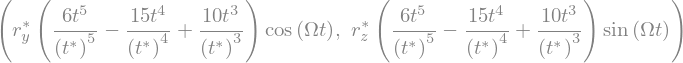

In [4]:
p = 10*(t/tstar)**3 - 15*(t/tstar)**4 + 6*(t/tstar)**5
ry = rystar * p
rz = rzstar * p

y_traj = ry * sp.cos(Omega * t)
z_traj = rz * sp.sin(Omega * t)
yDot_traj = sp.diff(y_traj, t)
yDDot_traj = sp.diff(yDot_traj, t)
zDot_traj = sp.diff(z_traj, t)
zDDot_traj = sp.diff(zDot_traj, t)

y_traj, z_traj

Um diese numerisch effizient auswerten zu können, werden Lambda-Funktionen erstellt: 

In [5]:
p_num = sp.lambdify((t, tstar), p, modules='numpy')
y_traj_num = sp.lambdify((t, tstar, rystar, Omega), y_traj, modules='numpy')
z_traj_num = sp.lambdify((t, tstar, rzstar, Omega), z_traj, modules='numpy')
yDDot_traj_num = sp.lambdify((t, tstar, rystar, Omega), yDDot_traj, modules='numpy')
zDDot_traj_num = sp.lambdify((t, tstar, rzstar, Omega), zDDot_traj, modules='numpy')

Die durch den Flachheitsnachweis hergeleiteten Gleichungen für Stellgrößen werden ebenso als Lambdafunktionen implementiert:

In [6]:
# Ersetze Systemparameter durch (willkuerliche) Konstanten
m, J1, J2, gx, gy, gz, lfh, lfv = 1, 1, 1, 0, 10, 0, 1, 1
Fx = m*aX - m*gx
Fx_traj_num = sp.lambdify((aX), Fx, modules='numpy')
DPhi = J1*aPhi
DPhi_traj_num = sp.lambdify((aPhi), DPhi, modules='numpy')
Fhy = (J1*wPhi*wPsi - J2*aTheta + (lfv-X)*(m*aY-m*gy))/(lfh + lfv)
Fhy_traj_num = sp.lambdify((wPhi, wPsi, aTheta, X, aY), Fhy, modules='numpy')
Fvy = (J2*aTheta - J1*wPhi*wPsi + (lfh+X)*(m*aY-m*gy))/(lfh + lfv)
Fvy_traj_num = sp.lambdify((wPhi, wPsi, aTheta, X, aY), Fvy, modules='numpy')
Fhz = (J1*wPhi*wTheta + J2*aPsi + (lfv-X)*(m*aZ-m*gz))/(lfh + lfv)
Fhz_traj_num = sp.lambdify((wPhi, aPsi, wTheta, X, aZ), Fhz, modules='numpy')
Fvz = (-J1*wPhi*wTheta - J2*aPsi + (lfh+X)*(m*aZ-m*gz))/(lfh + lfv)
Fvz_traj_num = sp.lambdify((wPhi, aPsi, wTheta, X, aZ), Fvz, modules='numpy')

So können nun die resultierenden Trajektorien des flachen Ausgangs und anschließend die Trajektorien der Stellkräfte und des Stellmoments berechnet werden:

In [7]:
# globale Variablen fuer spaetere Animation
Ysoll, Zsoll, Fvzsoll, time = [], [], [], []

def feed_forward_viz(rystar=5, rzstar=7, Omega=1, omega0=10, phi0=0, tstar=8, tend=20):
    global time
    global Ysoll
    global Zsoll
    global Fvzsoll
    
    # Flacher Ausgang
    time = np.arange(0, tend, 0.1)
    ry_traj = rystar * p_num(time[time<tstar], tstar)
    ry_traj = np.append(ry_traj, rystar * np.ones(len(time) - len(ry_traj))) # stationaeren Endwert fortsetzten
    rz_traj = rzstar * p_num(time[time<tstar], tstar)
    rz_traj = np.append(rz_traj, rzstar * np.ones(len(time) - len(rz_traj))) # stationaeren Endwert fortsetzten
    
    Ysoll = y_traj_num(time[time<tstar], tstar, rystar, Omega)
    Ysoll = np.append(Ysoll, rystar * np.cos(Omega * time[time>=tstar])) # stationaeren Endwert fortsetzten
    Zsoll = z_traj_num(time[time<tstar], tstar, rzstar, Omega)
    Zsoll = np.append(Zsoll, rzstar * np.sin(Omega * time[time>=tstar])) # stationaeren Endwert fortsetzten
    
    YsollDDot = yDDot_traj_num(time[time<tstar], tstar, rystar, Omega)
    YsollDDot = np.append(YsollDDot, -rystar * Omega**2 * np.cos(Omega * time[time>=tstar])) # stationaeren Endwert fortsetzten
    ZsollDDot = zDDot_traj_num(time[time<tstar], tstar, rzstar, Omega)
    ZsollDDot = np.append(ZsollDDot, -rzstar * Omega**2 * np.sin(Omega * time[time>=tstar])) # stationaeren Endwert fortsetzten
    
    Phisoll = omega0 * time + phi0

    # Stellkraefte / -moment
    Fxsoll = Fx_traj_num(np.zeros(len(time)))
    DPhisoll = DPhi_traj_num(np.zeros(len(time)))
    Fhysoll = Fhy_traj_num(omega0, 0, 0, 0, YsollDDot)
    Fvysoll = Fvy_traj_num(omega0, 0, 0, 0, YsollDDot)
    Fhzsoll = Fhz_traj_num(omega0, 0, 0, 0, ZsollDDot)
    Fvzsoll = Fvz_traj_num(omega0, 0, 0, 0, ZsollDDot)
    
    # Plot Flacher Ausgang, Stellkraefte
    plt.rcParams['figure.figsize'] = [25, 7]
    fig, axs = plt.subplots(2, 4)
    plt.subplots_adjust(hspace = 0.4)
    axs[0, 0].plot(time,ry_traj)
    axs[0, 0].set_title(r'$r_y$ -Trajektorie', fontsize=20)
    axs[0, 0].set(xlabel='$t$', ylabel=r'$r_y$')
    axs[0, 1].plot(time,rz_traj)
    axs[0, 1].set_title(r'$r_z$ -Trajektorie', fontsize=20)
    axs[0, 1].set(xlabel='$t$', ylabel=r'$r_z$')
    axs[0, 2].plot(Zsoll,Ysoll)
    axs[0, 2].set_title(r'$Y$-$Z$-Trajektorie', fontsize=20)
    axs[0, 2].set(xlabel=r'$Z_{soll}$', ylabel=r'$Y_{soll}$')
    axs[0, 3].plot(time,Phisoll)
    axs[0, 3].set_title(r'$\phi_{soll}$ -Trajektorie', fontsize=20)
    axs[0, 3].set(xlabel=r'$t$', ylabel=r'$\phi_{soll}$')
    axs[1, 0].plot(time,Fxsoll)
    axs[1, 0].set_title(r'$F_{x}$ -Trajektorie', fontsize=20)
    axs[1, 0].set(xlabel=r'$t$', ylabel=r'$F_{x}$')
    axs[1, 1].plot(time,DPhisoll)
    axs[1, 1].set_title(r'$D_{\phi}$ -Trajektorie', fontsize=20)
    axs[1, 1].set(xlabel=r'$t$', ylabel=r'$D_{\phi}$')
    axs[1, 2].plot(time,Fvysoll)
    axs[1, 2].set_title(r'$F_{v,y}$ -Trajektorie', fontsize=20)
    axs[1, 2].set(xlabel=r'$t$', ylabel=r'$F_{v,y}$')
    axs[1, 3].plot(time,Fvzsoll)
    axs[1, 3].set_title(r'$F_{v,z}$ -Trajektorie', fontsize=20)
    axs[1, 3].set(xlabel=r'$t$', ylabel=r'$F_{v,z}$')

In [8]:
out_plots = widgets.interactive(feed_forward_viz, rystar=(0, 10, 0.1), rzstar=(0, 10, 0.1), tstar=(0, 10, 0.1), tend=(10, 50, 0.5), Omega=(0, 10, 0.1), omega0=(0, 100, 1), phi0=(0, 180, 5));
display(out_plots)

interactive(children=(FloatSlider(value=5.0, description='rystar', max=10.0), FloatSlider(value=7.0, descripti…

Die $Y-Z$-Trajektorie des Massenmittelpunkts kann zudem auch zeitlich in einer Animation visualisiert werden (ggf. lange initiale Ladezeit):

MovieWriter ffmpeg unavailable; using Pillow instead.


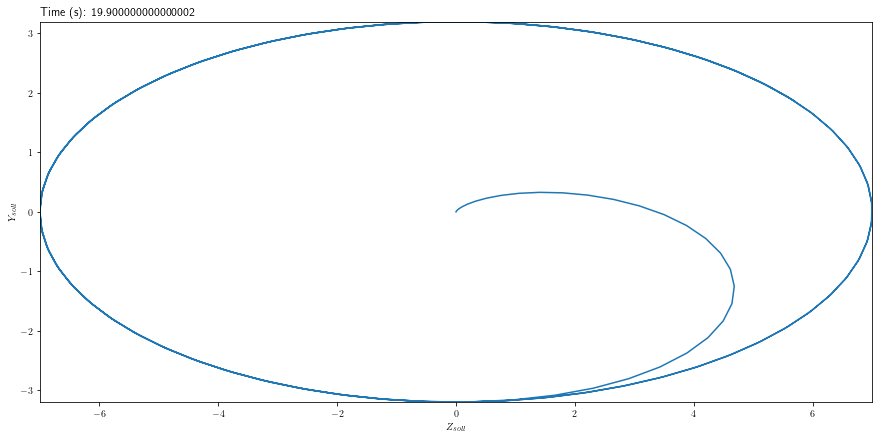

In [9]:
fig, ax = plt.subplots()
ax.set_xlim([min(Zsoll), max(Zsoll)])
ax.set_ylim([min(Ysoll), max(Ysoll)])
ax.set_aspect('equal')
ax.set_xlabel(r'$Z_{soll}$')
ax.set_ylabel(r'$Y_{soll}$')
dia = ax.plot([],[])[0]

def animate(i):
    ax.set_title('Time (s): ' + str(time[i]), loc='left')
    dia.set_data(Zsoll[:i], Ysoll[:i])

ani = mpla.FuncAnimation(fig, animate, frames=len(Zsoll))
HTML(ani.to_jshtml())

plt.rcParams["animation.html"] = "jshtml"
ani.save("EMSpindel.gif", fps=1 / (time[1] - time[0]))
ani

### Unterlagerter Stromregelkreis

In einer tiefergehenden Modellbetrachtung werden als eigentliche Ursachen der Kräfte die Ströme als Stellgrößen angesehen:
\begin{align}
    i_{\bullet} = \text{sgn}(F_{\bullet}) \sqrt{\frac{\mid F_{\bullet} \mid}{k_{\bullet}}} (\sigma_{\bullet}-s_{\bullet})
\end{align}

Dabei entspricht $s_{\bullet}$ der Abweichung der Spindelposition von der magnetischen Mittellage und $k_{\bullet}$ sowie $s_{\bullet}$ sind von der Geometrie des Aufbaus und von den magnetischen Eigenschaften des Materials abhängig. Genau genommen setzten sich die Magnetkräfte jeweils aus den beiden Teilkräften gegenüberliegender Pole zusammen: $F_{\bullet} = F_{\bullet, p} + F_{\bullet, n}$. Um stets einen positiven Strom zu stellen, wird jeweils auf einer Seite der Strom zu 0 gewählt und auf der anderen Seite der gesamte Strom gestellt. Negative Ströme $i_{\bullet} < 0$ können also als $i_{\bullet} = i_{\bullet, n} > 0$ und $i_{\bullet, p} = 0$ gedeutet werden.

Die Ströme können also, hier exemplarisch für $i_{h,z}$, ebenso durch den flachen Ausgang parametriert werden:

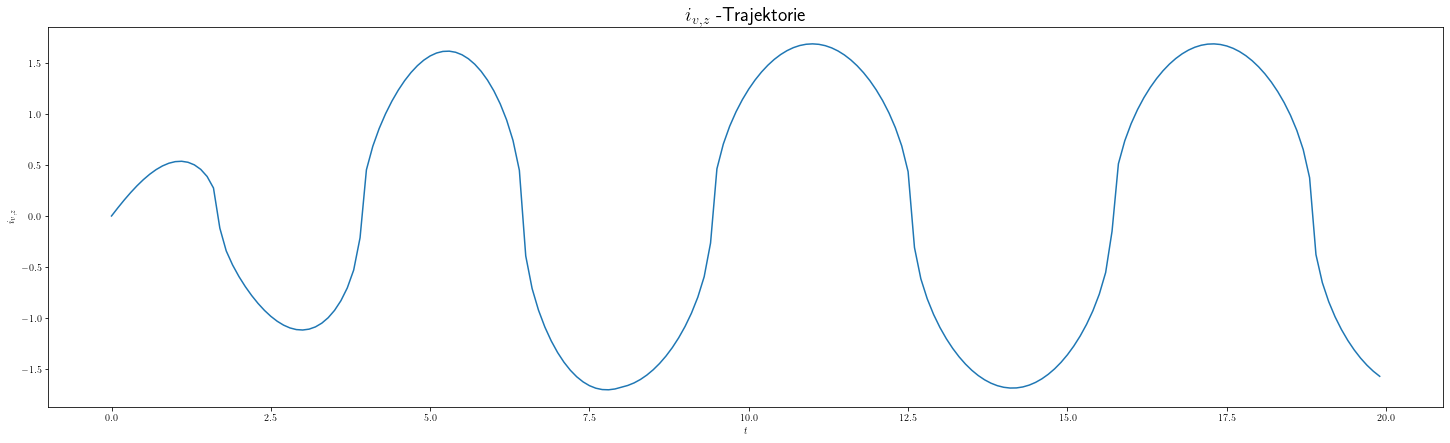

In [9]:
# Ersetze Systemparameter durch (willkuerliche) Konstanten
k, sigma, s = 1, 1, 0.1

ivz = np.sign(Fvzsoll) * np.sqrt(abs(Fvzsoll)/k) * (sigma - s)
plt.plot(time, ivz)
plt.title(r'$i_{v,z}$ -Trajektorie', fontsize=20)
plt.ylabel('$i_{v,z}$')
plt.xlabel('$t$')
plt.show()